In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<h2>1. Data Collection</h2>

In [2]:
path = '/Users/dobaophuc/Documents/học data analyst/Python/used_device_data.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<h2>2. Data Preprocessing</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<h4>Note: There are 4 categorical variables and 11 numerical variable.s</h4>

In [5]:
df.describe(include='all')

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,NaN,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718


In [6]:
missing_data = df.isnull()
for var in missing_data.columns.values.tolist():
    print(var)
    print(missing_data[var].value_counts())
    print('')


device_brand
False    3454
Name: device_brand, dtype: int64

os
False    3454
Name: os, dtype: int64

screen_size
False    3454
Name: screen_size, dtype: int64

4g
False    3454
Name: 4g, dtype: int64

5g
False    3454
Name: 5g, dtype: int64

rear_camera_mp
False    3275
True      179
Name: rear_camera_mp, dtype: int64

front_camera_mp
False    3452
True        2
Name: front_camera_mp, dtype: int64

internal_memory
False    3450
True        4
Name: internal_memory, dtype: int64

ram
False    3450
True        4
Name: ram, dtype: int64

battery
False    3448
True        6
Name: battery, dtype: int64

weight
False    3447
True        7
Name: weight, dtype: int64

release_year
False    3454
Name: release_year, dtype: int64

days_used
False    3454
Name: days_used, dtype: int64

normalized_used_price
False    3454
Name: normalized_used_price, dtype: int64

normalized_new_price
False    3454
Name: normalized_new_price, dtype: int64



<h4>Note: Attributes with missing values include "rear_camera_mp",'front_camera','internal_memory','ram','battery','weight'</h4>

<h3>Missing Data Processing</h3>

<p><strong>Method:</strong> Due to a considerable number of missing value in "rear_camera_mp", all the nan values would be replaced with the mean values. Meanwhile, removing nan values would be applied to the other variables</p>

In [7]:
df['rear_camera_mp'].mean()

9.460207633587805

In [8]:
df['rear_camera_mp'].replace(np.nan, df['rear_camera_mp'].mean(), inplace = True)

In [9]:
df.dropna(subset = ['front_camera_mp','internal_memory','ram','battery','weight'], axis = 0, inplace=True)

In [10]:
df.isnull().any()

device_brand             False
os                       False
screen_size              False
4g                       False
5g                       False
rear_camera_mp           False
front_camera_mp          False
internal_memory          False
ram                      False
battery                  False
weight                   False
release_year             False
days_used                False
normalized_used_price    False
normalized_new_price     False
dtype: bool

<h4>Double-checking... There are now 3432 rows with zero nan values in all variables...</h4>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3432 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3432 non-null   object 
 1   os                     3432 non-null   object 
 2   screen_size            3432 non-null   float64
 3   4g                     3432 non-null   object 
 4   5g                     3432 non-null   object 
 5   rear_camera_mp         3432 non-null   float64
 6   front_camera_mp        3432 non-null   float64
 7   internal_memory        3432 non-null   float64
 8   ram                    3432 non-null   float64
 9   battery                3432 non-null   float64
 10  weight                 3432 non-null   float64
 11  release_year           3432 non-null   int64  
 12  days_used              3432 non-null   int64  
 13  normalized_used_price  3432 non-null   float64
 14  normalized_new_price   3432 non-null   float64
dtypes: f

<h3>Duplicated values processing</h3>

In [12]:
df.duplicated().any()

False

<h4>All good!</h4>

<h2>3. Exploratory Data Analysis</h2>

<h3>Categorical Variables</h3>
<p>Box charts were used to evaluate whether a variable could be a potential identifier to the target 'normalized_used_price'</p>

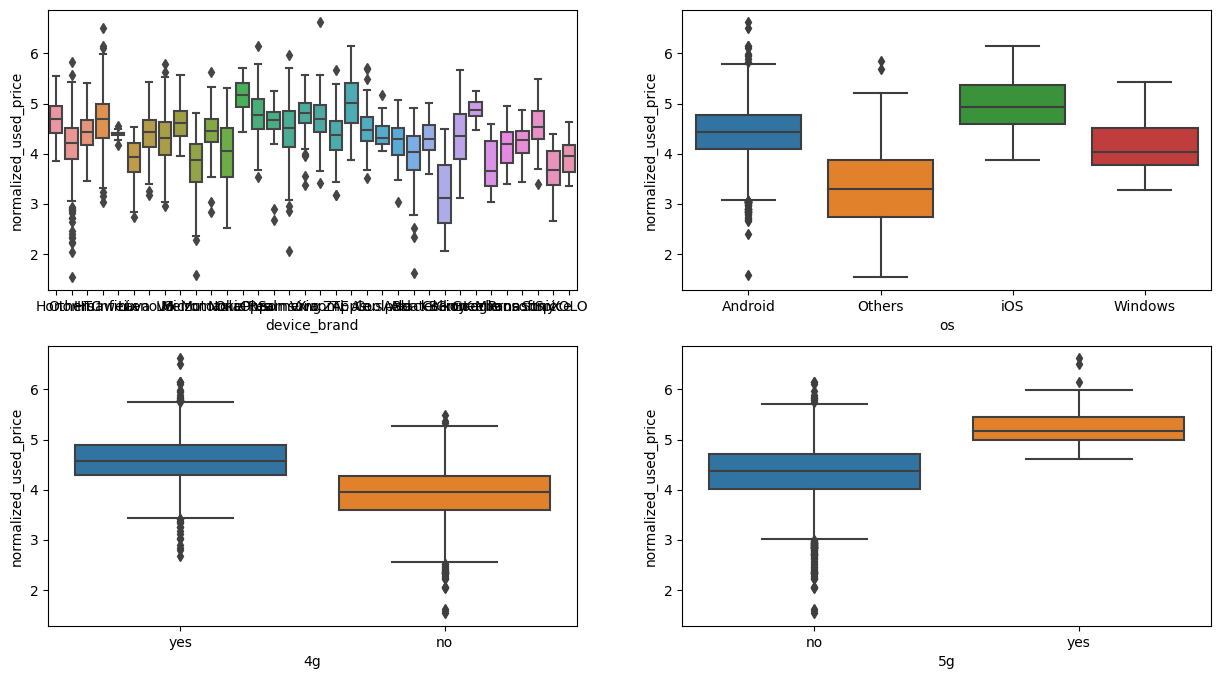

In [13]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)  #must put at the top of each plot
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

fig1 = sns.boxplot(x='device_brand', y='normalized_used_price', data = df, ax = ax1)
fig2 = sns.boxplot(x='os', y='normalized_used_price', data = df, ax = ax2)
fig3 = sns.boxplot(x='4g', y='normalized_used_price', data = df, ax = ax3)
fig4 = sns.boxplot(x='5g', y='normalized_used_price', data = df, ax = ax4)
plt.show()

<h4>Note: It can be seen from the charts that 'os', '4g', and '5g' attributes could be used as a potential predictor to the 'normalized_used_price'</h4>

In [14]:
from scipy import stats
os = df[['os','normalized_used_price']].groupby(by = 'os')

In [15]:
f_val, p_val = stats.f_oneway(os.get_group('Android')['normalized_used_price'], 
                              os.get_group('Others')['normalized_used_price'], 
                              os.get_group('iOS')['normalized_used_price'], 
                              os.get_group('Windows')['normalized_used_price'])
print('F=',f_val,', p_value =', p_val)

F= 177.4905528483022 , p_value = 5.70681317166973e-107


In [16]:
fourg = df[['4g','normalized_used_price']].groupby(by = '4g')
f_val, p_val = stats.f_oneway(fourg.get_group('yes')['normalized_used_price'], 
                              fourg.get_group('no')['normalized_used_price']) 
        
print('F=',f_val,', p_value =', p_val)

F= 1485.571646139282 , p_value = 2.3646315981649986e-270


In [17]:
fiveg = df[['5g','normalized_used_price']].groupby(by = '5g')
f_val, p_val = stats.f_oneway(fiveg.get_group('yes')['normalized_used_price'], 
                              fiveg.get_group('no')['normalized_used_price']) 
        
print('F=',f_val,', p_value =', p_val)

F= 379.39323850806716 , p_value = 3.1312330508520735e-80


<h4>-> Using ANOVA method, 'os', '4g', and '5g' attributes can be concluded to have a significantly strong correlation to the 'normalized_used_price', with high F values and p_value close to 0</h4>

<h3>Numerical Variables</h3>

In [18]:
df.corr()['normalized_used_price'].sort_values()

days_used               -0.365200
internal_memory          0.189858
weight                   0.379881
ram                      0.515776
release_year             0.520062
rear_camera_mp           0.563671
front_camera_mp          0.608389
screen_size              0.609638
battery                  0.611461
normalized_new_price     0.832147
normalized_used_price    1.000000
Name: normalized_used_price, dtype: float64

<h4>In case you need some color...Here you are...</h4>

<AxesSubplot:>

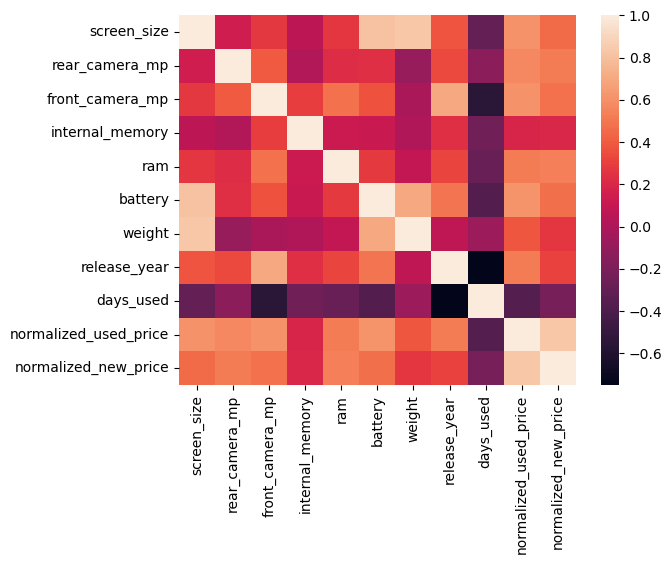

In [19]:
sns.heatmap(df.corr())

<h4>Picking variables with Pearson absolute value larger than 0.5, we have 'ram','release_year','rear_camera_mp','screen_size','battery' and 'normalized_new_price' in the potential list.</h4>

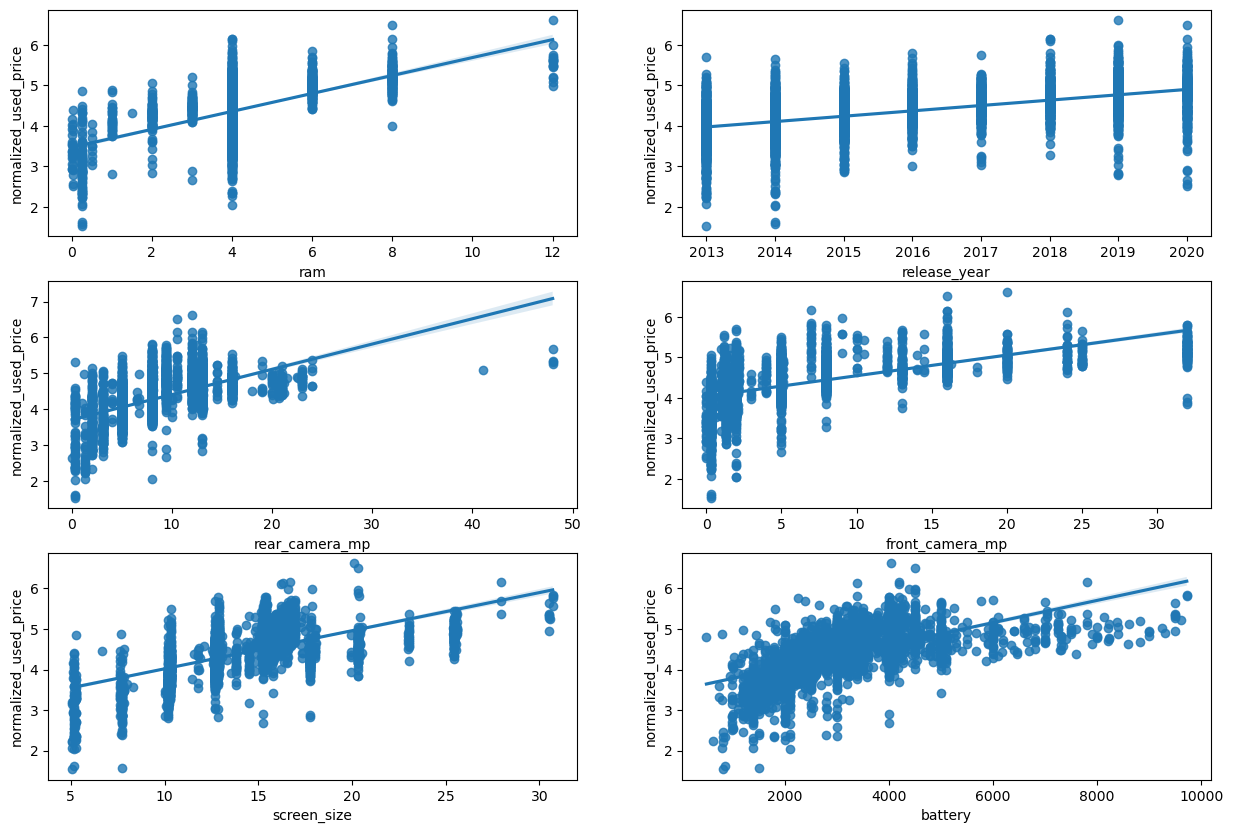

In [20]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(3,2,1) #(height,width,position)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

fig = sns.regplot(x='ram', y='normalized_used_price', data = df, ax = ax1)
fig = sns.regplot(x='release_year', y='normalized_used_price', data = df, ax = ax2)
fig = sns.regplot(x='rear_camera_mp', y='normalized_used_price', data = df, ax = ax3)
fig = sns.regplot(x='front_camera_mp', y='normalized_used_price', data = df, ax = ax4)
fig = sns.regplot(x='screen_size', y='normalized_used_price', data = df, ax = ax5)
fig = sns.regplot(x='battery', y='normalized_used_price', data = df, ax = ax6)

plt.show()

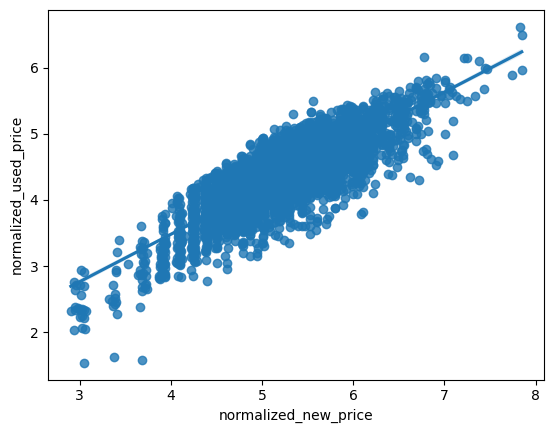

In [21]:
sns.regplot(x='normalized_new_price', y='normalized_used_price', data = df)
plt.show()

In [22]:
for i in ['ram','release_year','rear_camera_mp','front_camera_mp','screen_size','battery','normalized_new_price']:
    ps_coef, p_value = stats.pearsonr(df[i], df['normalized_used_price'])
    print(i)
    print('R=',ps_coef,' p_value=',p_value)
    print('')

ram
R= 0.5157758740995824  p_value= 1.1616551017371347e-232

release_year
R= 0.5200615797352925  p_value= 3.491050454448338e-237

rear_camera_mp
R= 0.5636709503132902  p_value= 4.20242798969161e-287

front_camera_mp
R= 0.6083890429355033  p_value= 0.0

screen_size
R= 0.6096382037450494  p_value= 0.0

battery
R= 0.6114610925882278  p_value= 0.0

normalized_new_price
R= 0.8321473687687335  p_value= 0.0



<p>In conclusion, the shorted list of potential predictors in our model includes:</p>
    
<p> Numerical variables:</p> 
<ul>
    <li> ram </li>
    <li> release_year </li>
    <li> rear_camera_mp </li>
    <li> front_camera_mp </li>
    <li> screen_size </li>
    <li> battery </li>
    <li> normalized_new_price </li>
</ul> 

<p> Categorical variables:</p>
    <ul>
    <li> os</li>
    <li> 4g</li>
    <li> 5g</li>
    </ul>

<h2>4. Model Development</h2>

<h3>Train and Fit Numerical Variables</h3>

In [23]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<h4>Let's try fitting a Polynomial Features model, degree = 2 with all numerical variables first.</h4>

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#create object (degree = 2)
pr= PolynomialFeatures(degree=2)
Z = df[['ram','release_year','rear_camera_mp','front_camera_mp', 'screen_size', 'battery', 'normalized_new_price']]
#transform
Z_pr = pr.fit_transform(Z)

#fit model
plr = LinearRegression()
poly1 = plr.fit(Z_pr,df['normalized_used_price'])


In [25]:
poly1.intercept_

5580.513134885322

In [26]:
poly1.coef_

array([-1.47626913e-06, -3.41522346e+00, -5.52346997e+00,  2.44852792e+00,
       -5.94908482e-01,  5.99665324e+00,  4.46074858e-03, -3.14252212e+01,
        1.07101845e-02,  1.76240467e-03, -2.41230646e-04, -2.91559957e-04,
        1.07705396e-02, -1.40165237e-05, -5.95157804e-02,  1.36675905e-03,
       -1.17242472e-03,  2.99530396e-04, -2.94833436e-03, -2.16463858e-06,
        1.59013755e-02, -4.84517955e-05,  4.16072813e-05, -2.01266282e-03,
        2.60585792e-06, -8.10529797e-03, -3.17977878e-04,  8.39146381e-04,
       -5.62257289e-07,  6.24417430e-04,  1.81191929e-03, -3.93765257e-06,
       -1.69646922e-02,  3.78399748e-09, -2.47751950e-06,  2.98516488e-02])

In [27]:
yhat = poly1.predict(Z_pr)

<h4>Testing the accuracy of this model...</h4>

/Users/dobaophuc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dobaophuc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


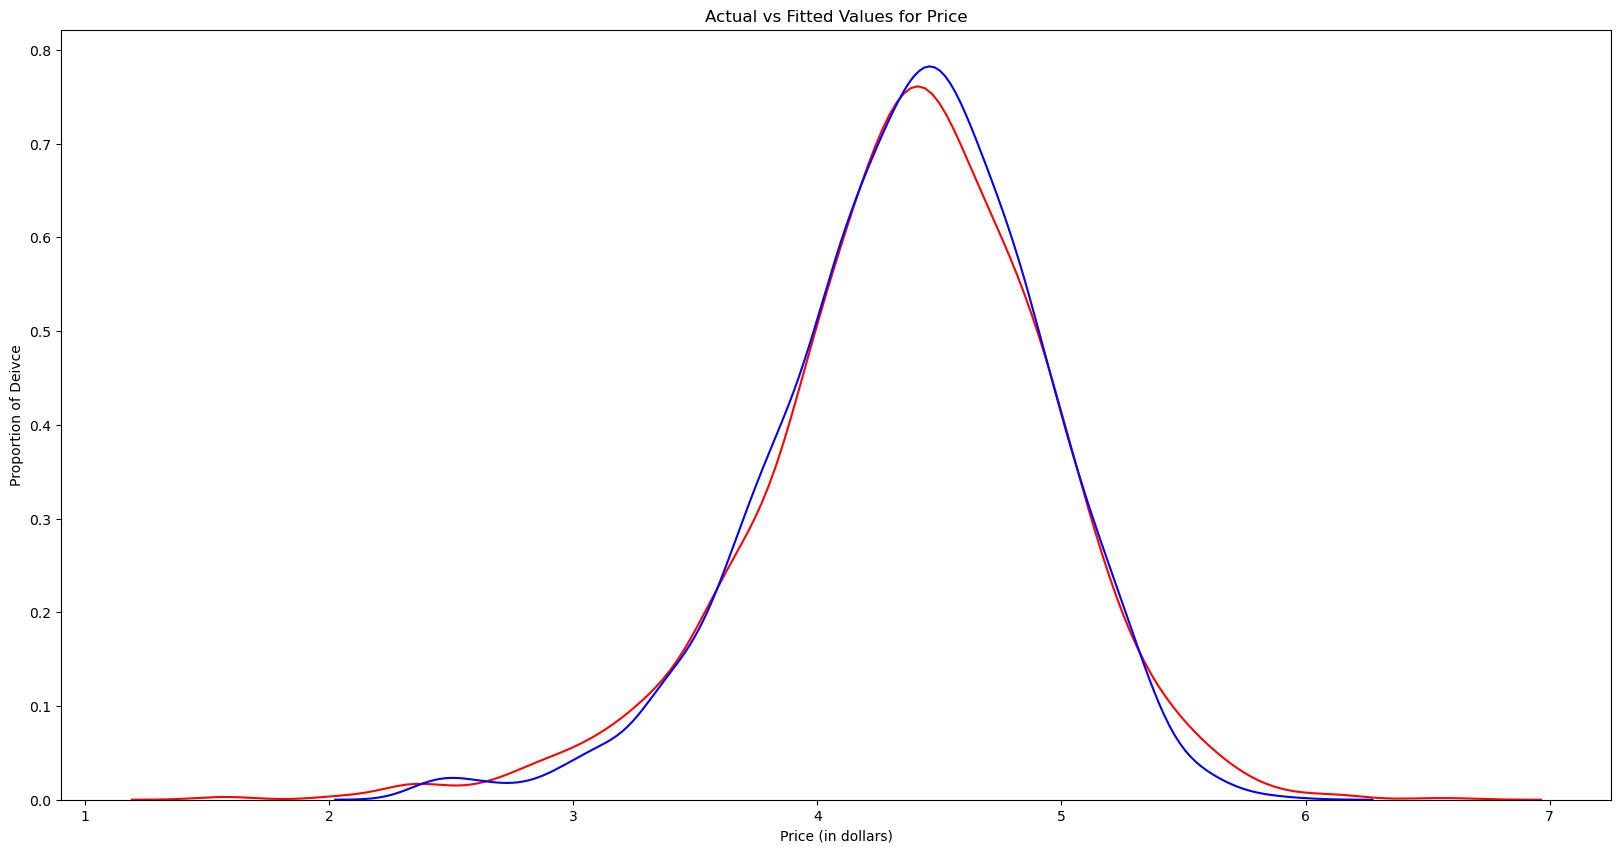

In [28]:
plt.figure(figsize=(20,10))


ax1 = sns.distplot(df['normalized_used_price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Deivce')

plt.show()
plt.close()

<h4>Comment: The model can predict exactly the target values within the range (4,4.5) and (5,5.5). However, there were still some room for improvement as, for example, from 2 to 3.5, or 4.5 to 5,...</h4>

In [29]:
poly1.score(Z_pr,df['normalized_used_price'])

0.8504333350511338

<h4>... which means 85% of the Actual Used Price can be explained by the model</h4>

<h3>Train and Fit both Categorical and Numerical Variables</h3>

<h4>Now it's show time for the Categorical Variables to be put into the model. The categories were broken down into numerical values by using dummies variable method.</h4>

In [30]:
os_only = pd.get_dummies(df['os'])

In [31]:
df['4g'] = df['4g'].map({'yes':1,'no':0})
df['5g'] = df['5g'].map({'yes':1,'no':0})
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [32]:
df1 = pd.concat([os_only, df], axis = 1)
df1.drop('os', axis = 1, inplace = True)

<h4>Next, the degree was run from 1 to 7 to test which degree worked out the best R squared score for the model. However, because the codes usually take a comparatively long time to process, I will let the code lines in markdown format and proceed with the result of this test, which is degree=6</h4>

In [33]:
#R2 = []
#Z = df1[['Android','Others','Windows','iOS','4g','5g','ram','release_year','rear_camera_mp','front_camera_mp', 'screen_size', 'battery', 'normalized_new_price']]
#plr = LinearRegression()
#order = [1,2,3,4,5,6,7]
#for n in order:
#    poly = PolynomialFeatures(degree=n)
#    Z_pr= poly.fit_transform(Z)
#    plr.fit(Z_pr, df1['normalized_used_price'])
#    R2.append(plr.score(Z_pr,df1['normalized_used_price']))
#print(R2)

In [39]:
pr= PolynomialFeatures(degree=6)
#transform
#return 1 array list hệ phương trình thay giá trị x1,x2,x3,x4
Z1 = df1[['Android','Others','Windows','iOS','4g','5g','ram','release_year','rear_camera_mp','front_camera_mp', 'screen_size', 'battery', 'normalized_new_price']]
Z1_pr = pr.fit_transform(Z1)

	#fit model
poly1 = plr.fit(Z1_pr,df1['normalized_used_price'])

yhat1 = poly1.predict(Z1_pr)

<h4>Now, to compare with the previous model, I will perform 2 charts with and without categorical variables and then also compare the R score in 2 scenarios.</h4>

/Users/dobaophuc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dobaophuc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dobaophuc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

Text(0, 0.5, 'Proportion of Deivce')

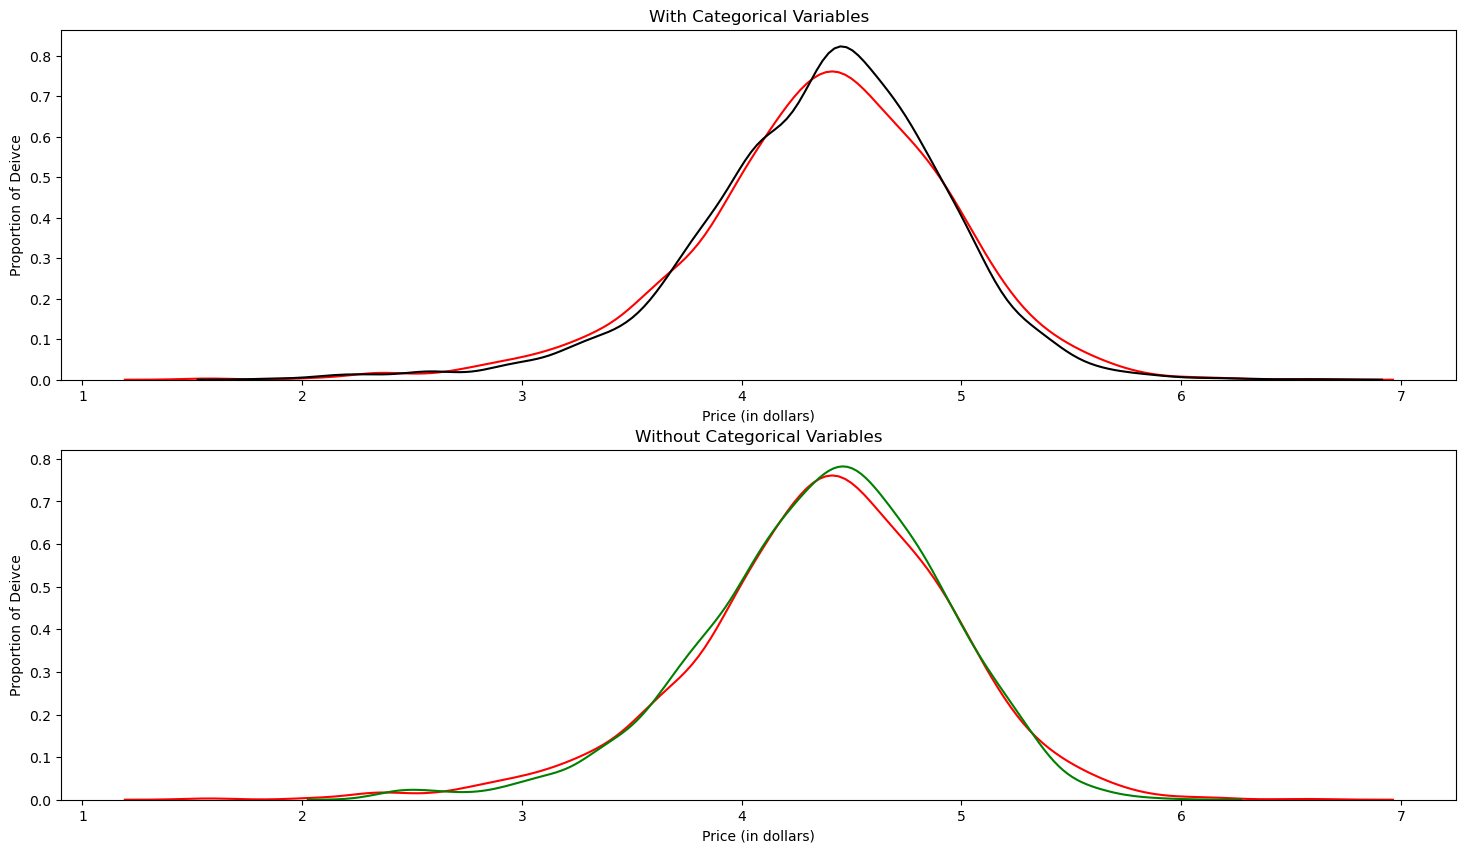

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

fig.set_size_inches(18,10)
fig1 = sns.distplot(df1['normalized_used_price'], hist=False, color="r", label="Actual Value", ax=ax1)
sns.distplot(yhat1, hist=False, color="black", label="Fitted Values", ax=ax1)

fig1.set_title('With Categorical Variables')
fig1.set_xlabel('Price (in dollars)')
fig1.set_ylabel('Proportion of Deivce')

fig.set_size_inches(18,10)
fig2 = sns.distplot(df['normalized_used_price'], hist=False, color="r", label="Actual Value", ax=ax2)
sns.distplot(yhat, hist=False, color="Green", label="Fitted Values", ax=ax2)

fig2.set_title('Without Categorical Variables')
fig2.set_xlabel('Price (in dollars)')
fig2.set_ylabel('Proportion of Deivce')

In [40]:
poly1.score(Z1_pr,df1['normalized_used_price'])

0.899602922335474

<h2>Conclusion</h2>

<h4>The new model with Categorical Variables have increased the R squared value to nearly 90% compared to the previous one (85%). Hence, the best model to predict the used car prices is the polynomial feature model with degree 6 and include 7 numerical variables and 3 categorical variables (see line 22), which can explain about 90% of the actual used car price values.</h4>

<h2>THANK YOU FOR WATCHING MY PROJECT!</h2>